In [2]:
library(readxl)
SECTOR_A <- read_excel("SectorA.xlsx")
SECTOR_B <- read_excel("SectorB.xlsx")

# Primera Parte

**1.	Considere la variable discreta de la información del sector A y realice un sucinto análisis exploratorio (sugerencia: solo mire ocurrencia y gráfico con medidas de tendencia central, variabilidad y localización).**

In [224]:
summary(SECTOR_A)

    Inmueble          tipo             estrato          numero_habitantes
 Min.   :  1.00   Length:100         Length:100         Min.   :0.00     
 1st Qu.: 25.75   Class :character   Class :character   1st Qu.:2.00     
 Median : 50.50   Mode  :character   Mode  :character   Median :3.00     
 Mean   : 50.50                                         Mean   :3.13     
 3rd Qu.: 75.25                                         3rd Qu.:4.00     
 Max.   :100.00                                         Max.   :7.00     
 metros_cuadrados
 Min.   :59.40   
 1st Qu.:67.80   
 Median :70.75   
 Mean   :71.74   
 3rd Qu.:74.68   
 Max.   :85.85   

In [225]:
tipo = SECTOR_A$tipo
tabla1  = data.frame(table(tipo))
tabla1

tipo,Freq
No Residencial,20
Residencial,80


In [226]:
estrato = SECTOR_A$estrato
tabla2  = data.frame(table(estrato))
tabla2

estrato,Freq
Alto,32
Bajo,57
Medio,11


In [3]:
habitantes = SECTOR_A$numero_habitantes
tabla3  = data.frame(table(habitantes))
tabla3

habitantes,Freq
0,2
1,11
2,19
3,33
4,19
5,9
6,5
7,2


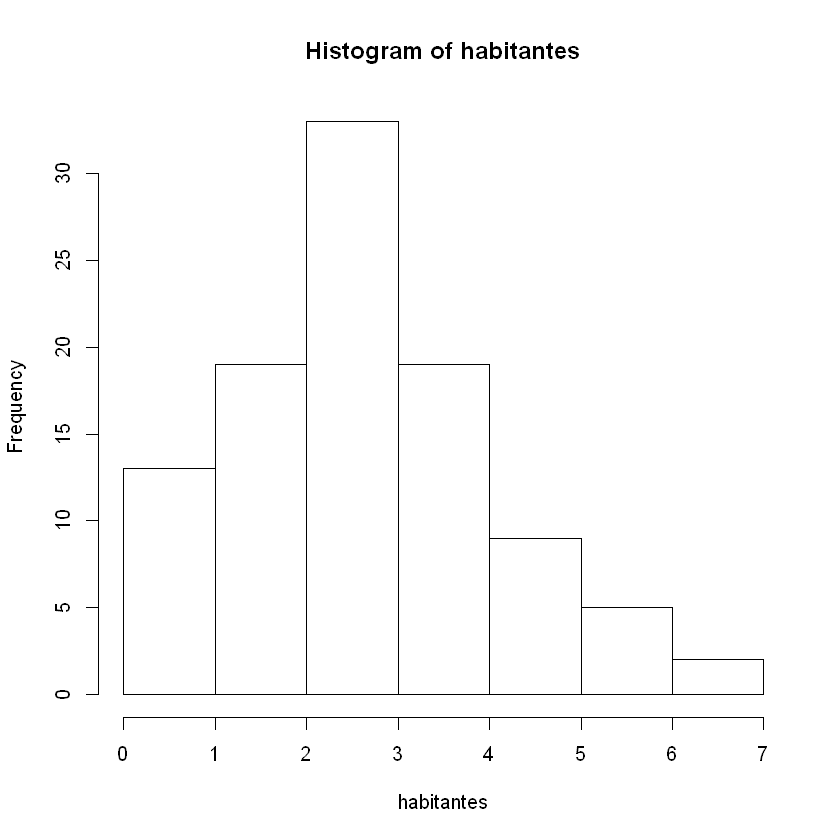

In [4]:
hist(habitantes)

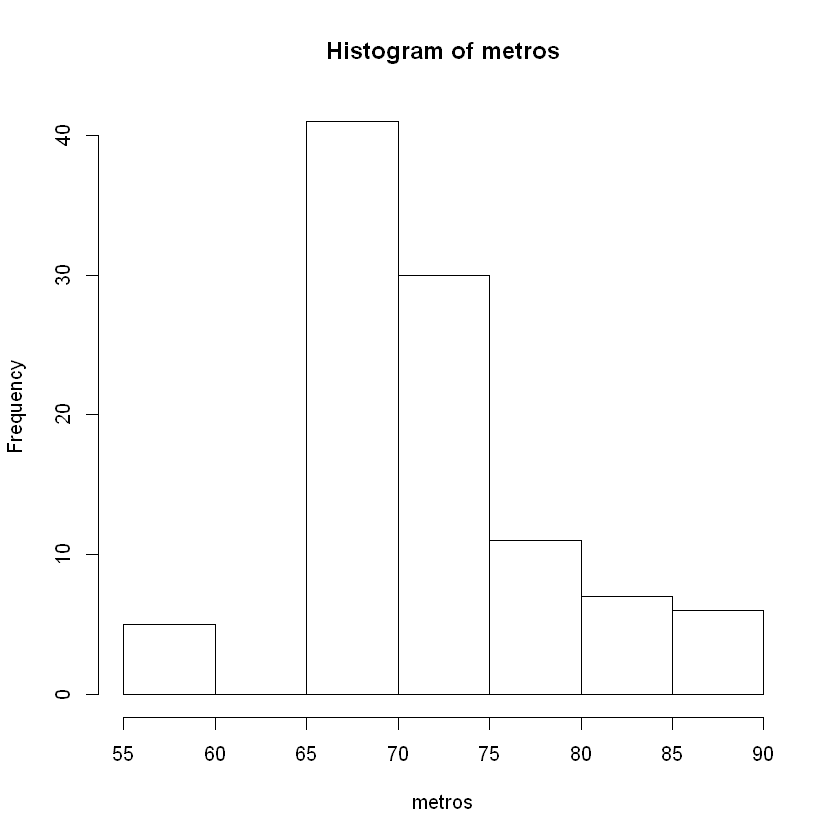

In [5]:
metros = SECTOR_A$metros_cuadrados
hist(metros)

**2.	Investigar sobre estadisticos de orden y usarlos para estimar el valor minimo y su respectivo error estandar.**

# Segunda Parte

Resolver los siguientes problemas usando inferencia clásica. Tener presente que son dos muestras de diferente tamaño. Resultados con justificación. 

**1. Con respecto a los inmuebles del sector B, estimar el porcentaje y error estándar de inmuebles residenciales que hace parte del estrato bajo.**

In [12]:
n_B=length(SECTOR_B$estrato)
n_B

[1] 71

In [231]:
r1=sum(SECTOR_B$estrato=="Bajo")/n_B
r1

[1] 0.5915493

In [126]:
st=sqrt((r1*(1-r1))/n_B)
st

[1] 0.05833593

$$st(r)=\frac{s}{\sqrt{n}} = \sqrt{\frac{r(1-r)}{n}} = \sqrt{\frac{0.59(1-0.59)}{71}} = 0.058$$

**2. Proponga un intervalo de confianza del 95%, para establecer la proporción de inmuebles de tipo residencial y que sea de estrato medio para el sector A.**

In [11]:
n_A=length(SECTOR_A$estrato)
n_A

[1] 100

In [233]:
r2=sum(SECTOR_A$tipo=="Residencial" & SECTOR_A$estrato=="Medio")/n_A
r2

[1] 0.11

Para $100(1-\alpha)\%=95\%$. Despejando tenemos, $\alpha = 0.05$

El intervalo de confianza de para una proporción está dado por: $[\hat{r}-\epsilon,\hat{r}+\epsilon]$

donde $\epsilon = z_{1-a/2}\sqrt{\frac{\hat{r}(1-\hat{r})}{n}} = 1.96\sqrt{\frac{0.11(1-0.11)}{100}} = 0.061$

In [234]:
error=qnorm(0.975)*sqrt((r2*(1-r2))/n_A)
error

[1] 0.06132527

In [235]:
l_inf=r2-error
l_inf

[1] 0.04867473

In [236]:
l_sup=r2+error
l_sup

[1] 0.1713253

$[\hat{r}-\epsilon,\hat{r}+\epsilon] = [0.11 - 0.0613,0.11 + 0.0613]= [0.0486,0.1713]$

**3. ¿Es posible inferir que el más del 50% de los inmuebles del sector A tienen más de 75 metros cuadrados?**

In [140]:
r3=sum(SECTOR_A$metros_cuadrados>75)/n_A
r3

[1] 0.24

Para realizar la inferencia se realiza una prueba de hipótesis sobre la proporción de inmuebles que tienen más de 75 metros cuadrados, con una confiabilidad del 95%. 

Las hipótesis a someter a prueba son: $$H_0:p_0=50\%$$ $$H_1:p_0\neq 50\%$$
El Estadístico de prueba de una proporción para muestras mayores o igual a 30 es 
$$Z = \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$
Donde $\hat{p}$ es la proporción de la muestra, $\hat{p}=0.24$

Para la prueba a dos colas se rechaza la hipótesis nula $H_0$ si $$Z< -Z_{\alpha/2} \ o\ bien\ Z > Z_{\alpha/2}$$

lo que es equivalente a $$\mid Z \mid> \mid Z_{\alpha/2}\mid$$

$$Z = \frac{0.24-0.5}{\sqrt{\frac{0.5(1-0.5)}{100}}} = -5.2$$

In [98]:
Z = (0.24-0.5)/sqrt(0.5*(1-0.5)/100)
Z

[1] -5.2

Tenemos que para una confiabilidad del 95%, el nivel de significancia $\alpha$ es 0.05. Por lo que el valor crítico es:
$$Z_{\alpha/2}=1.96$$

In [99]:
qnorm(1-0.05/2)

[1] 1.959964

y como  la desigualdad $\mid-5.2 \mid>\mid-1.96 \mid$ se cumple, se rechaza la hipótesis nula. Por lo tanto, no hay suficiente evidencia estadística para afirmar que el 50% de los inmuebles del sector A tienen más de 75 metros cuadrados

In [101]:
prop.test(24, 71, conf.level = 0.95)


	1-sample proportions test with continuity correction

data:  24 out of 71, null probability 0.5
X-squared = 6.8169, df = 1, p-value = 0.00903
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2326983 0.4610189
sample estimates:
        p 
0.3380282 


**4. Usando una prueba de hipótesis con el 99% de confianza e indicar si hay diferencias significativas entre los metros cuadrados de los inmuebles de sector A y del sector B. (suponer normalidad) (Sugerencia: No olvide estudiar la varianza de los metros cuadrados de cada sector para decidir que prueba usar )**

In [238]:
s_A=var(SECTOR_A$metros_cuadrados)
s_B=var(SECTOR_B$metros_cuadrados)

Para conocer qué prueba de hipótesis se debe usar, se realiza primero una prueba de hipótesis respecto a la igualdad de las dos varianzas. $$H_0: \sigma_A^2 = \sigma_B^2$$ $$H_1: \sigma_A^2 \neq \sigma_B^2$$

El estadístico de prueba es $$F=\frac{s_A^2}{s_B^2} = \frac{38.74^2}{56.16^2}=0.475$$

La hipótesis nula se rechaza cuando $$F>F_{1-\alpha/2,glA,glB}$$

Tenemos que $\alpha=0.05, glA=(n_A-1)=99,glB=(n_B-1)=70$

In [55]:
qf(0.975,df1=70,df2=99)

[1] 1.533718

Entonces, el valor crítico es: 
$$F_{0.975,99,70} = 1.533 $$

Debido a que el estadístico de prueba no está en la región de rechazo, hay evidencia estadística para aceptar que las varianzas son iguales.

Con este resultado, se propone la siguiente prueba de hipótesis respecto a la diferencia de medias de las dos muestras con varianzas iguales: 
$$H_0: (\mu_A-\mu_B)=D_0$$
$$H_1: (\mu_A-\mu_B)\neq D_0$$

$$con\ D_0=0 $$

El Estadístico de prueba es:
$$t= \frac{(\overline{x_A}-\overline{x_B})-D_0}{s_p \sqrt{\frac{1}{n_A}+\frac{1}{n_B}}}$$

donde $s_p$ es el promedio ponderado de las varianzas muestrales: $$s_p= \frac{(n_A-1)s_A^2+(n_B-1)s_B^2}{n_A+n_B-2}$$

La prueba de hipótesis se rechaza cuando $t>t_{\alpha}$. El valor crítico de $t_{\alpha}$ está basado en $n_A+n_B-2=100+71-2=169$ grados de libertad

Para $100(1-\alpha)\%=99\%$. el nivel de significancia es, $\alpha = 0.01$. Entonces, el valor crítico es:

$$t_{1-\alpha,169}=2.348$$

In [239]:
t_a = qt(0.99,169)
t_a

[1] 2.348615

Con las varianzas muestrales $s_A=38.74$ y $s_B=56.16$, Calculamos $s_p:$

$$s_p= \sqrt{\frac{(100-1)38.74^2+(71-1)56.16^2}{100+71-2}}=46.75$$

In [241]:
s_p=sqrt((99*s_A^2+70*s_B^2)/(100+71-2))
s_p

[1] 46.75211

Con los promedios muestrales $\overline{x_A}=71.74$ y $\overline{x_B}=71.19$, podemos calcular $t:$

$$t= \frac{(71.74-71.19)-0}{46.75 \sqrt{\frac{1}{100}+\frac{1}{71}}}= 0.076$$

In [242]:
x_A=mean(SECTOR_A$metros_cuadrados)
x_B=mean(SECTOR_B$metros_cuadrados)
t=(x_A-x_B)/(s_p*sqrt(1/100+1/71))
t

[1] 0.07622377

Al comparar el valor crítico $t_{1-\alpha,169}=2.348$ con el estadístico de prueba $t=0.076$, no se puede rechazar la hipótesis nula. Por lo tanto, hay evidencia estadística para afirmar con un 99% de confianza que no hay diferencias significativas entre los metros cuadrados de los inmuebles del sector A y sector B.

**5. Pensando en un modelo de Poisson, ¿cuántos habitantes por inmueble se estima para el sector B? (No olvide calcular el error estandar). Estime la probabilidad de que las personas tengan entre 3 y 5 habitantes por inmuebles en el sector B. (Aquí noo es necesario calcular el  error estandar).**

Utilizando el modelo de Poisson la estimación de habitantes se realiza mediante la estimación de $\lambda$. A partir de la estimación de máxima verosimilitud se tiene que $$\lambda=\sum_{i=0}^{n} \frac{x_i}{n}=\sum_{i=0}^{71} \frac{x_i}{71}=4.83$$

In [25]:
lambda = mean(SECTOR_B$numero_habitantes)
st_lambda=lambda/n_B
lambda
st_lambda

[1] 4.830986

[1] 0.06804206

El error estándar se calcula como $$st(\lambda)=\frac{\lambda}{\sqrt{n}} = \frac{4.83}{71} = 0.068$$

La función de probabilidad para el modelo Poisson es la siguiente:
$$p(x) = \left\{
   \begin{array}{ll}
 \frac{e^{-\lambda} \lambda^x}{x!}      & \mathrm{si\ } x =0,1,2,... 3 \\
  0     & en\ otro\ caso
   \end{array}
 \right.$$
 
 Ahora, para estimar la probabilidad de que hayan entre 3 y 5 habitantes por inmueble:
 
 $$P[3\le x \le 5] = P[x=3]+P[x=4]+P[x=5]= 0.150+0.181+0.175 = 0.5059 = 50.59\%$$
 
 

In [36]:
prob=dpois(3,lambda)+dpois(4,lambda)+dpois(5,lambda)
prob

[1] 0.5059604

La probabilidad de que hayan entre 3 y 5 habitantes por inmueble en el sector es del 50.59%

**6. Encontrar evidencia estadística para decidir si la proporción de inmuebles residenciales del Sector B, es 3 veces la proporción de inmuebles no residenciales.**

Se necesita establecer si la proporción de inmuebles residenciales del sector B es tres veces la proporción de inmuebles no residenciales: $r_{ir} = 3\cdot r_{inr}$

Teniendo que $r_{inr} = 1 - r_{ir}$, se reemplaza y despeja la proporción de inmuebles residenciales que será sometida a prueba:
$$r_{ir} = 3\cdot r_{inr}$$
$$r_{ir} = 3\cdot (1-r_{ir})$$
$$r_{ir} =  \frac{3}{4}=0.75$$

Calculamos la proporción muestral $\hat{p}$ mediante $\hat{p}=\frac{x}{n}$ donde $x$ es la cantidad de muebles residenciales del sector B
$$\hat{p}=\frac{57}{71}=0.8028 = 80.28\%$$



In [53]:
p_r=sum(SECTOR_B$tipo=="Residencial")/n_B
p_r

[1] 0.8028169

Las hipótesis a someter a prueba son: $$H_0:p_0=75\%$$ $$H_1:p_0\neq 75\%$$

El Estadístico de prueba de una proporción para muestras mayores o igual a 30 es:

$$Z = \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} = $$

Para la prueba a dos colas, la hipótesis nula $H_0$ es rechazada si $\mid Z \mid >\mid Z_{\alpha/2}\mid$

Para lograr confiabilidad del 95%, el nivel de significancia $\alpha$ es 0.05. Por lo que
$$Z_{\alpha/2}=1.96$$



y como  $\mid -5.2 \mid >= 1.96$, se rechaza la hipótesis nula. Por lo tanto, menos del 50% de los inmuebles del sector A tienen más de 75 metros cuadrados

In [40]:
3/4

[1] 0.75

In [69]:
qnorm(1-0.05/2)

[1] 1.959964

In [93]:
aa$

df 
 1


	1-sample proportions test with continuity correction

data:  24 out of 71, null probability 0.5
X-squared = 6.8169, df = 1, p-value = 0.00903
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2326983 0.4610189
sample estimates:
        p 
0.3380282 
